In [1]:
# Importing All the Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the training data 
rain_trn = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')

In [3]:
# Showing the first 5 rows of the dataframe
rain_trn.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
# Checking shape of the dataframe
rain_trn.shape

(2190, 13)

In [5]:
# Showing information about the dataframe
rain_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


- From the information, we can conclude that the:
  1. The Dataframe is entirly based upon the numericals features.
  2. There are 10 float and 3 Integer based column.

In [6]:
# Describing the Dataframe
rain_trn.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


##### The task is Classification Based

In [7]:
# Checking nulls or duplicates 
print(f'Nulls Present in the data:\n {rain_trn.isnull().sum()}')
print(f'Duplicates in data:{rain_trn.duplicated().sum()}')

Nulls Present in the data:
 id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64
Duplicates in data:0


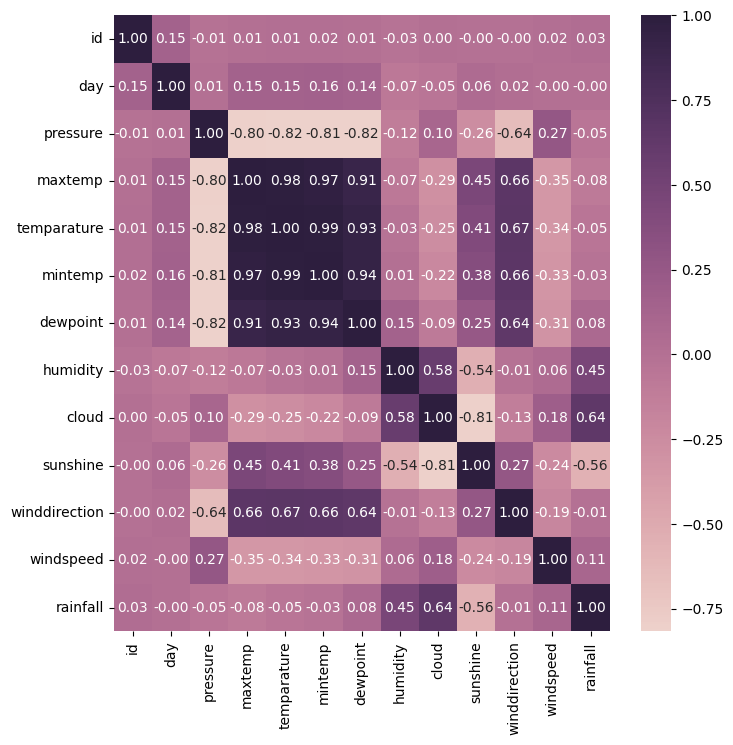

In [8]:
# Showing correlation through heatmap
rain_corr = rain_trn.corr()
plt.figure(figsize=(8,8))
sns.heatmap(rain_corr, annot=True, fmt='.2f', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

From the Correlation Heatmap, we can conclude the following:
1. The target column(rainfall) is highly correlated with only two columns which are Humidity and Cloud.
2. Target column is inversely correlated with sunlight.
3. Dewpoint column is highly positively correlated with maxtemp, mintemp, and temprature, and Dewpoint even very less but is positively correlated with the target column.
4. ID and day column are not contributing much to the correlation , and due to irrelevancy with target would also not be able to contribute to prediction. Therefore it would be right to drop them from this work.

In [9]:
# Dropping irrelevent columns
rain_trn = rain_trn.drop(['id','day'], axis=1)

In [10]:
# Showing all the remaning columns
rain_trn.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall'],
      dtype='object')

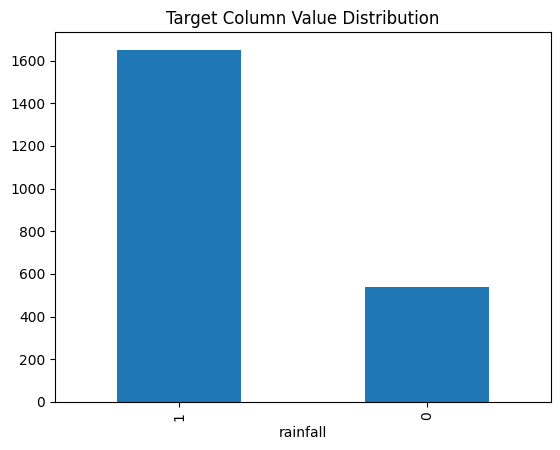

In [11]:
rain_trn['rainfall'].value_counts().plot(kind='bar')
plt.title('Target Column Value Distribution')
plt.show();

- Clearly Target column is highly imbalanced

In [12]:
# Making Independent and Dependent Variable
X = rain_trn.drop(['rainfall'], axis=1)
Y = rain_trn['rainfall']

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [14]:
# Splitting data into train and test subset
rain_X_trn, rain_X_tst, rain_y_trn, rain_y_tst = train_test_split(X,Y, test_size=0.2, shuffle=True)

In [15]:
# Checking shape of subset
rain_X_trn.shape, rain_y_trn.shape, rain_X_tst.shape, rain_y_tst.shape

((1752, 10), (1752,), (438, 10), (438,))

In [16]:
smt_bal = SMOTE() # Initializing balancer
bal_rain_X_trn, bal_rain_y_trn = smt_bal.fit_resample(rain_X_trn, rain_y_trn) #Fitting for resampling